In [2]:
# 3rd party
import numpy as np
import os

In [3]:
# our own
import skeletalModel_new
import plot_skeleton_BH
import scale_axes

In [4]:
fnameIn = "../Data/Rotated/"
npy_files = [file for file in os.listdir(fnameIn) if file[-4:] == '.npy']

output_path = "../Data/Preprocessed_M/"

In [5]:
confidence = True

In [6]:
if confidence:
    for name_video in npy_files:
        print("... processing '%s'" % name_video)
        path_video = fnameIn + name_video
        video = np.load(path_video)

        reshaped_video = video.reshape(-1, 67, 4)
        reshaped_video_noconfidence = reshaped_video[:,:,:3]
        confidence = reshaped_video[:,:,3:]

        scale_xyz_vec = np.zeros(reshaped_video_noconfidence.shape)

        for i in range(reshaped_video_noconfidence.shape[0]):
            # print(reshaped_video[i,:,:])
            scale_xyz_vec[i,:,:] = scale_axes.scale_axes(reshaped_video_noconfidence[i,:,:])
            # print("..........")

        # scale_xyz_vec = np.concatenate((scale_xyz_vec, confidence), 2)
        scale_xyz_vec = scale_xyz_vec.reshape(-1, 3*67)

        print(name_video, output_path)
        output_path_video = output_path + name_video
        with open(output_path_video, 'wb') as f:
            np.save(f, scale_xyz_vec)

... processing '190425_asl1.npy'
190425_asl1.npy ../Data/Preprocessed_M/
... processing '190419_asl5.npy'
190419_asl5.npy ../Data/Preprocessed_M/
... processing '190419_asl2.npy'
190419_asl2.npy ../Data/Preprocessed_M/
... processing '190611_asl10.npy'
190611_asl10.npy ../Data/Preprocessed_M/
... processing '190611_asl3.npy'
190611_asl3.npy ../Data/Preprocessed_M/
... processing '190611_asl4.npy'
190611_asl4.npy ../Data/Preprocessed_M/
... processing '190425_asl9.npy'
190425_asl9.npy ../Data/Preprocessed_M/
... processing '190419_asl4.npy'
190419_asl4.npy ../Data/Preprocessed_M/
... processing '190425_asl7.npy'
190425_asl7.npy ../Data/Preprocessed_M/
... processing '190611_asl5.npy'
190611_asl5.npy ../Data/Preprocessed_M/
... processing '190611_asl11.npy'
190611_asl11.npy ../Data/Preprocessed_M/
... processing '190611_asl2.npy'
190611_asl2.npy ../Data/Preprocessed_M/
... processing '190611_asl8.npy'
190611_asl8.npy ../Data/Preprocessed_M/
... processing '190611_asl12.npy'
190611_asl12.

In [7]:
fnameIn = "../Data/CZ_Rotated/"
npy_files = [file for file in os.listdir(fnameIn) if file[-4:] == '.npy']

output_path = "../Data/Preprocessed_J/"

In [8]:
confidence = False

In [9]:
if not confidence:
    for name_video in npy_files:
        print("... processing '%s'" % name_video)
        path_video = fnameIn + name_video
        video = np.load(path_video)

        reshaped_video = video.reshape(-1, 67, 3)

        scale_xyz_vec = np.zeros(reshaped_video.shape)

        for i in range(reshaped_video.shape[0]):
            # print(reshaped_video[i,:,:])
            scale_xyz_vec[i,:,:] = scale_axes.scale_axes(reshaped_video[i,:,:])
            # print("..........")


        scale_xyz_vec = scale_xyz_vec.reshape(-1, 3*67)

        print(name_video, output_path)
        output_path_video = output_path + name_video
        with open(output_path_video, 'wb') as f:
            np.save(f, scale_xyz_vec)

... processing '190611_asl3.npy'
190611_asl3.npy ../Data/Preprocessed_J/
... processing '190425_asl10.npy'
190425_asl10.npy ../Data/Preprocessed_J/
... processing '190611_asl4.npy'
190611_asl4.npy ../Data/Preprocessed_J/
... processing '190611_asl15.npy'
190611_asl15.npy ../Data/Preprocessed_J/
... processing '190611_asl12.npy'
190611_asl12.npy ../Data/Preprocessed_J/
... processing '190425_asl1.npy'
190425_asl1.npy ../Data/Preprocessed_J/
... processing '190419_asl5.npy'
190419_asl5.npy ../Data/Preprocessed_J/
... processing '190419_asl2.npy'
190419_asl2.npy ../Data/Preprocessed_J/
... processing '190611_asl13.npy'
190611_asl13.npy ../Data/Preprocessed_J/
... processing '190611_asl14.npy'
190611_asl14.npy ../Data/Preprocessed_J/
... processing '190611_asl5.npy'
190611_asl5.npy ../Data/Preprocessed_J/
... processing '190611_asl2.npy'
190611_asl2.npy ../Data/Preprocessed_J/
... processing '190425_asl9.npy'
190425_asl9.npy ../Data/Preprocessed_J/
... processing '190419_asl4.npy'
190419_a

## Mireia

In [10]:
fnameIn = "../Data/Preprocessed_M/190611_asl2.npy"

In [11]:
with open(fnameIn, 'rb') as f:
    x = np.load(f)

In [12]:
for i, frame in enumerate(x):
    reshaped_frame = frame.reshape(-1, 3)
    if (reshaped_frame[:,0] > 0.75).sum() > 15:
        print(i)
        

2592
2593
2594
2595
2596
2597
6695
6696
8383


In [13]:
o = 8383

In [14]:
x_confidence = []
for i in range(67):
    x_confidence += list(x[o][i*3:i*3+3])
    x_confidence += [1] 

In [15]:
def swipe(x_confidence, order = (1, 2, 0)):
    reshaped = np.array(x_confidence).reshape(-1, 4)
    
    new_matrix = np.ones(reshaped.shape)
    
    for i in range(3):
            
        new_matrix[:,i] = reshaped[:,order[i]]
        
    new_vector = new_matrix.flatten()
    
    return new_vector
        
    
def erase_outliers(data, threshold, offset = 0):
    new_list = np.array(data)
    
    for i in range(len(data)//4):
        if data[i*4 + offset] > threshold:
            new_list[i*4 + offset] = 999
    
    return new_list

In [16]:
cleaned = erase_outliers(x_confidence, threshold = 0.75)

In [17]:
rotated = swipe(cleaned)

In [18]:
for i in range(len(x_confidence) - 3):
    if x_confidence[i] == x_confidence[i+1] and x_confidence[i] == x_confidence[i+2]:
        print("klw")

klw


In [19]:
a = [1,2,3]

In [20]:
# x_confidence

(<Figure size 432x288 with 1 Axes>,)

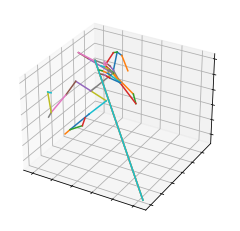

In [21]:
plot_skeleton_BH.plot_3D_skeleton(np.array(x_confidence), show_animation = False, labels = False, hands = False)

## Rotated

In [22]:
fnameIn = "../Data/Rotated/190611_asl2.npy"

In [23]:
with open(fnameIn, 'rb') as f:
    x = np.load(f)

In [24]:
o = 3087

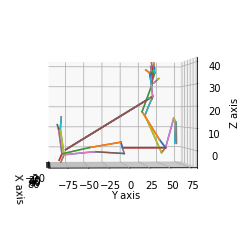

In [25]:
plot_skeleton_BH.plot_3D_skeleton(x[o])

## Jordi

In [26]:
fnameIn = "../Data/Preprocessed_J/190611_asl2.npy"

In [27]:
with open(fnameIn, 'rb') as f:
    y = np.load(f)

In [28]:
o = 8383

In [29]:
y_confidence = []
for i in range(67):
    y_confidence += list(y[o][i*3:i*3+3])
    y_confidence += [1] 

In [30]:
rotated = swipe(y_confidence)

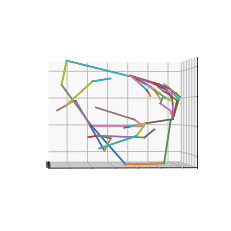

In [31]:
plot_skeleton_BH.plot_3D_skeleton(rotated, show_animation = True, labels = False, hands = False)

## CZ

In [32]:
fnameIn = "../Data/Preprocessed_CZ/190611_asl2.npy"

In [33]:
with open(fnameIn, 'rb') as f:
    y = np.load(f)

In [34]:
o = 8383

In [35]:
y_confidence = []
for i in range(67):
    y_confidence += list(y[o][i*3:i*3+3])
    y_confidence += [1] 

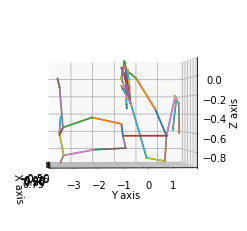

In [36]:
plot_skeleton_BH.plot_3D_skeleton(y_confidence)

## CZ Rotated

In [37]:
fnameIn = "../Data/CZ_Rotated/190611_asl2.npy"

In [38]:
with open(fnameIn, 'rb') as f:
    y = np.load(f)

In [39]:
o = 8383

In [40]:
y_confidence = []
for i in range(67):
    y_confidence += list(y[o][i*3:i*3+3])
    y_confidence += [1] 

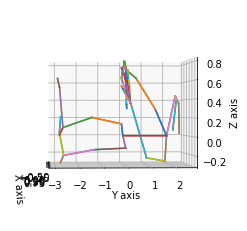

In [41]:
plot_skeleton_BH.plot_3D_skeleton(y_confidence)